## PCA
Principal Component Analysis is the the most popular dimensianality reduction algorithm. It identifies the hyperplane that lies closest to the data and then it projects data onto it.

PCA identifies the axis that accounts for the largest amount of variance in the training data. It also finds the second axis, that is orthogonal to the first one. These axes are called principal components.

Principal components can be found with standard matrix factorization technique called <i>Single Value Decomposition</i>. The traing set matrix $X$ is decomposed into matrix multiplication of three matrices $U \sum V^T$, where $V$ contains the units vectors that define all the principal components.

In [251]:
import numpy as np

# Generate data
X1 = np.linspace(0,3, 100)
X2 = 2*X1 + 1 + np.random.randn(100,)/1.5
X = np.c_[X1, X2]

principal componets: 
 [[ 0.40207927  0.91560486]
 [ 0.91560486 -0.40207927]]
Singualar Values: 
 [20.81643281  2.77606957]


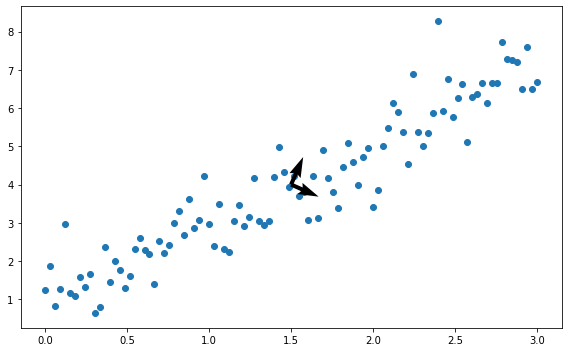

In [254]:
import matplotlib.pyplot as plt

# obtain principal componetns
X_centered = X - X.mean(axis=0)
U,S,Vt = np.linalg.svd(X_centered)

# unit vectors of principal components
pc1 = Vt.T[:, 0]
pc2 = Vt.T[:, 1]

# lets multiply with eigen values(eigen_value = sqrt(singular_value))
pc1 = pc1*np.sqrt(S[0])
pc2 = pc2*np.sqrt(S[1])
fig, ax = plt.subplots(figsize=(8,5))
_ = ax.scatter(X[:,0], X[:,1])
origin = np.array([[1.5,1.5],[4,4]])
_ = ax.quiver(1.5, 4, pc1[0], pc1[1])
_ = ax.quiver(1.5, 4, pc2[0], pc2[1])

print('principal componets: \n', Vt.T)
print('Singualar Values: \n', S)

In [255]:
# Projecting the training set down to d dimensions
# X_d-proj = X.W_d

W_1 = Vt.T[:, :1]
X2D = X_centered.dot(W_1)

### Using Scikit-Learn
Scikit-Learn uses SVD to implement PCA

In [256]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

print('principal components: \n', pca.components_)
print('Singular Values: \n', pca.singular_values_)


principal components: 
 [[ 0.40207927  0.91560486]
 [-0.91560486  0.40207927]]
Singular Values: 
 [20.81643281  2.77606957]


### Choosing the Right Numbr of Dimensions

In [258]:
import pandas as pd

# load dataset 'Breast cancer Wisconsin'
df = pd.read_csv("data/data_bcw.csv")
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.0


Original Dimentsion of data:    30
Minimum no. of dimension to preserve 95% of variance:   10
Dimension of the reduced data set:    10


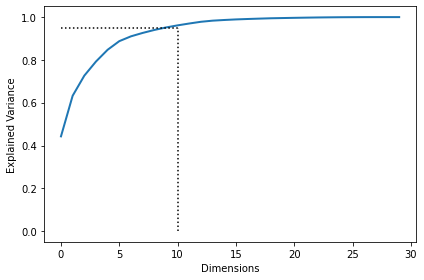

In [262]:
X = df.to_numpy()[:,:-1]  # last column contains labels

print('Original Dimentsion of data:   ', X.shape[1])

# Choose right dimension that preserves sufficient large portion of variance
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('Minimum no. of dimension to preserve 95% of variance:  ', d)

# Reducing the dataset to new dataset preserving 95% variance
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
print('Dimension of the reduced data set:   ', X_reduced.shape[1])

# Explained variance as a function of dimension
fig, ax = plt.subplots()
_ = ax.plot(cumsum, linewidth=2)
_ = ax.set(ylabel='Explained Variance', xlabel='Dimensions')
_ = ax.plot([d, d],[0, 0.95], 'k:')
_ = ax.plot([0, d],[0.95, 0.95], 'k:')